### Import the Libraries:

In [28]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score


### Load the Dataset:

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Exploration:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# 'Gender' column to numeric
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

### Data visualization:

- Pair Plot Visualization:

c:\Python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


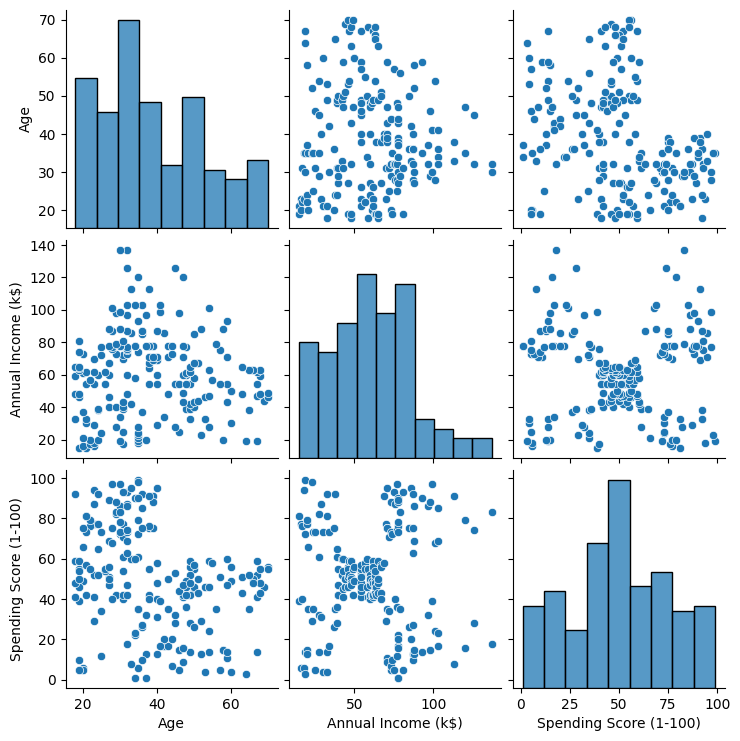

In [7]:
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.savefig('pairplot_features.png')
plt.show()

- Correlation Heatmap:

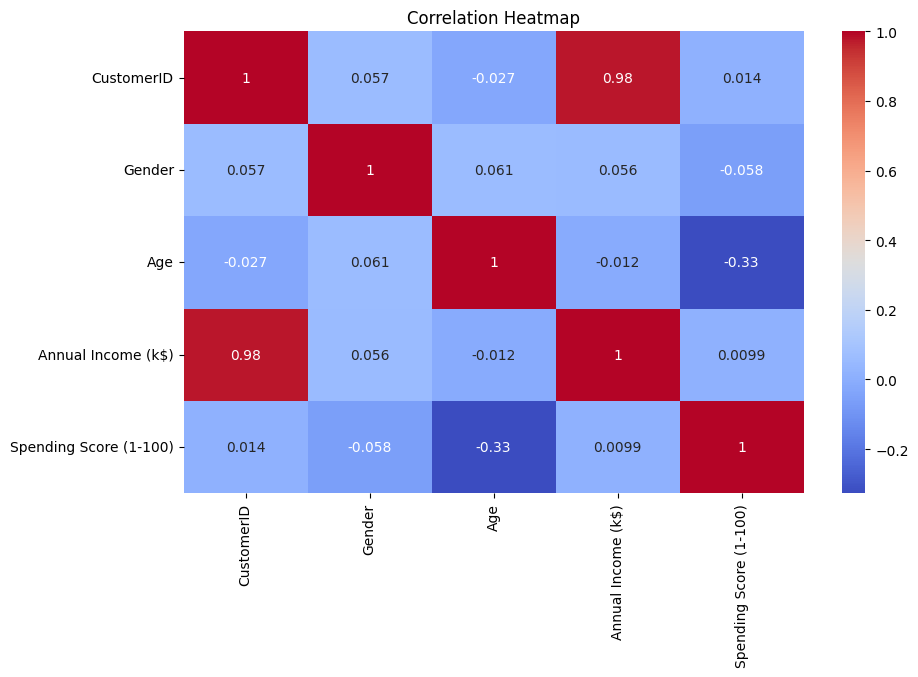

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

- Distribution of Spending Score

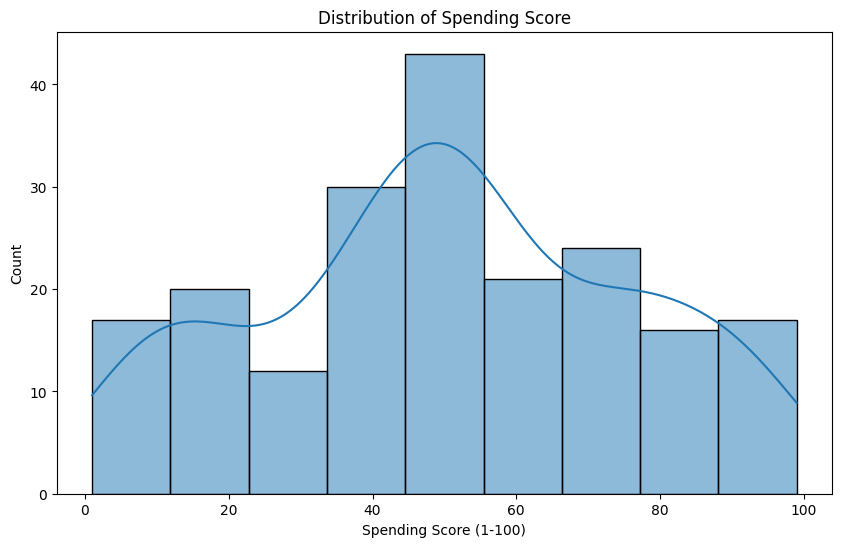

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')
plt.savefig('distribution_spending_score.png')
plt.show()

- Distribution of Annual Income:

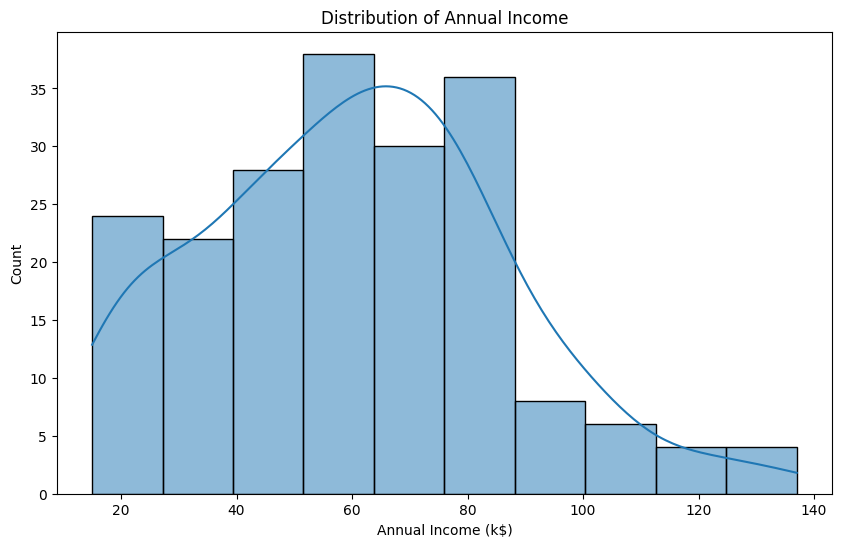

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income')
plt.savefig('distribution_annual_income.png')
plt.show()

- Distribution of Age:

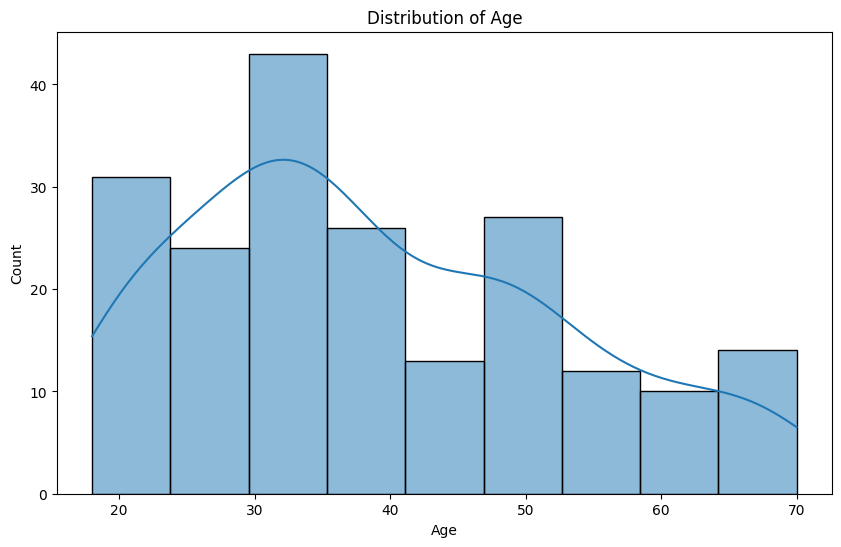

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.savefig('distribution_age.png')
plt.show()

- Spending score by Gender:

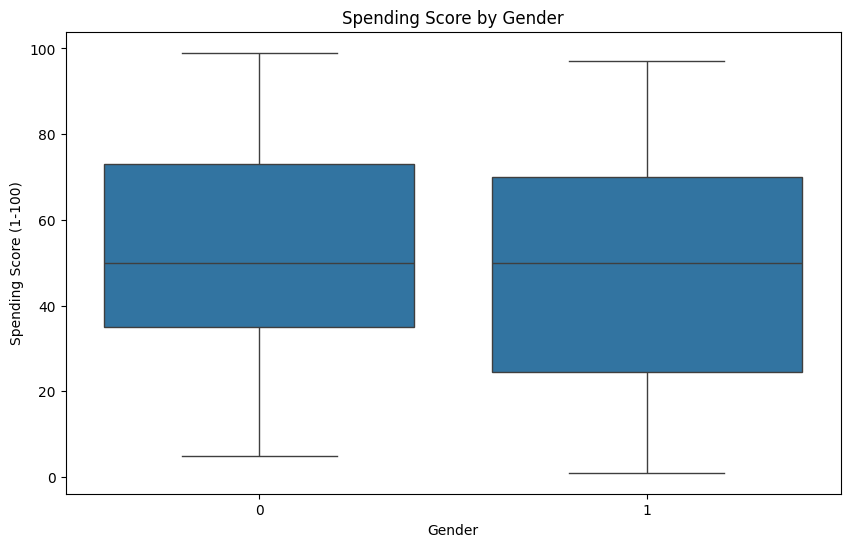

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data)
plt.title('Spending Score by Gender')
plt.savefig('boxplot_spending_gender.png')
plt.show()


- Annual income by Gender:

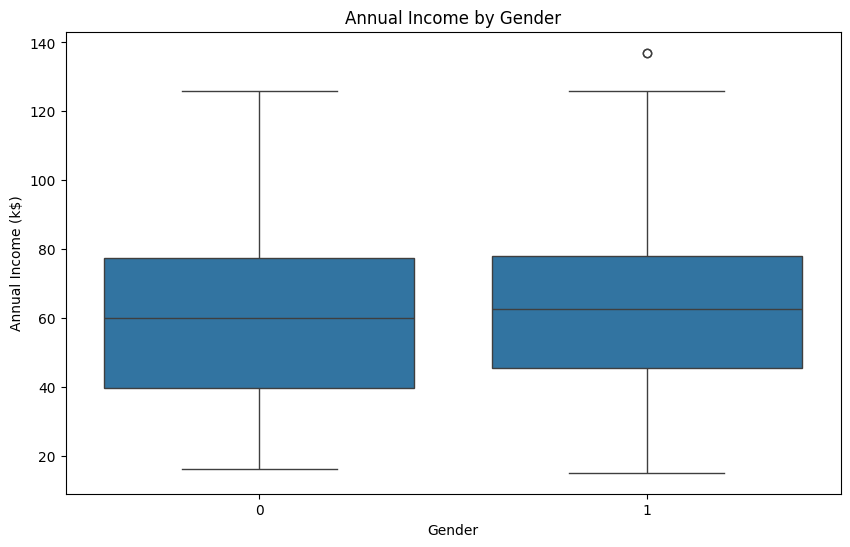

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data)
plt.title('Annual Income by Gender')
plt.savefig('boxplot_income_gender.png')
plt.show()

- Distribution of Gender:

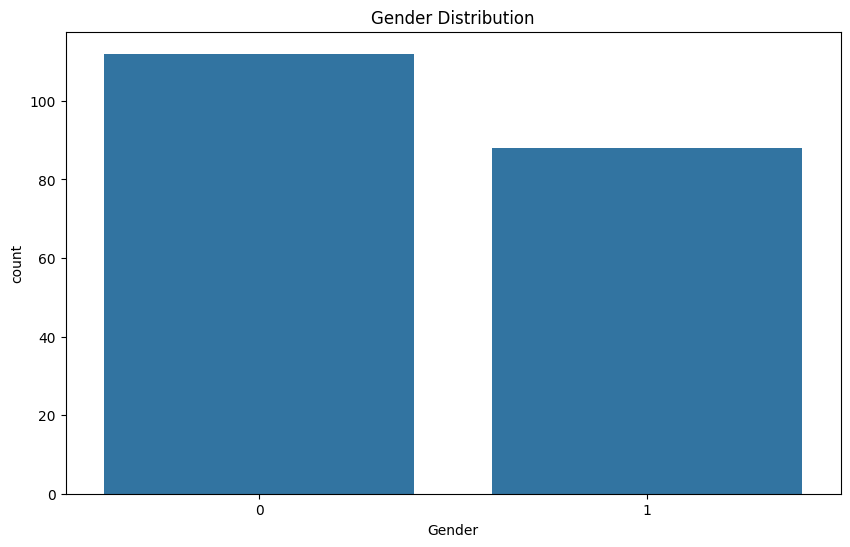

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.savefig('gender_distribution.png')
plt.show()

### Data Preprocessing:

In [16]:
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### K-means Clustering and Model Training:

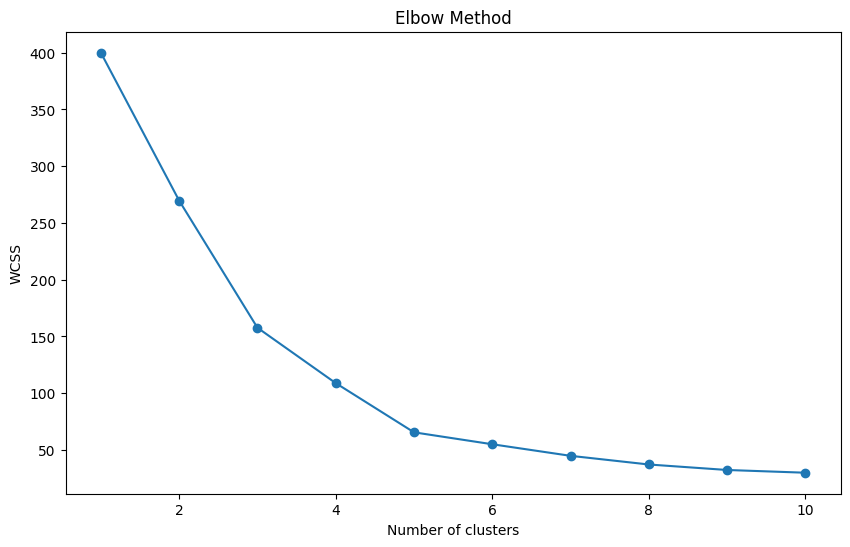

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_method.png')
plt.show()

In [18]:
optimal_clusters = 5  
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [20]:
data['Cluster'] = clusters

### Model Evaluation:

In [21]:
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5546571631111091


### Cluster Visualization:

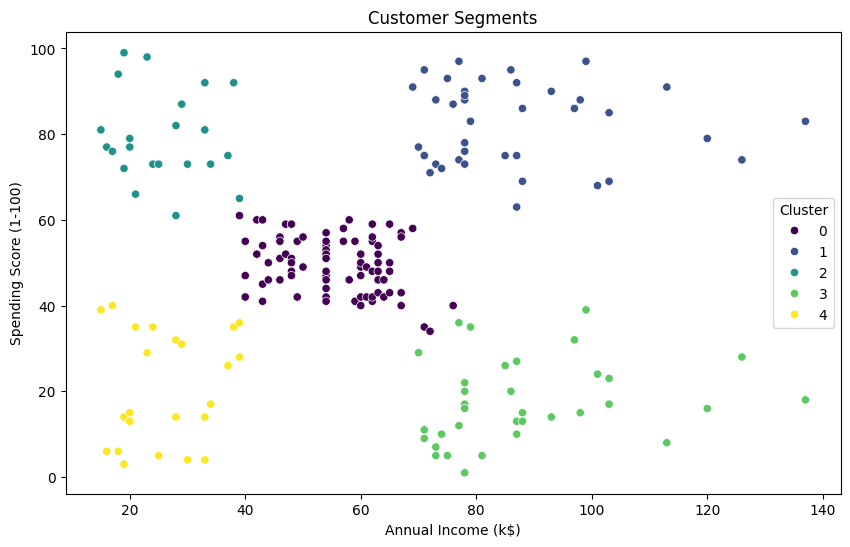

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments')
plt.savefig('customer_segments.png')
plt.show()

The K-means clustering model successfully segmented the customers into five distinct groups. The silhouette score of 0.5547 indicates that the clustering has a good separation of clusters. Future improvements could include experimenting with different clustering algorithms, feature engineering to improve clustering performance, and using cross-validation to ensure model robustness.